In [21]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

In [63]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # Checking accuracy. If accuracy is above 95% then it will stop training.
    if(logs.get('accuracy') > 0.995):
      self.model.stop_training = True

callbacks = myCallback()

In [64]:
from keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training set
training_set = train_datagen.flow_from_directory('/home/lionex/bin/Python/Project-Kathakali/Kathakali Dataset/train', target_size=(256, 256), batch_size=32, class_mode='categorical', subset='training')

# Load the validation set
validation_set = train_datagen.flow_from_directory('/home/lionex/bin/Python/Project-Kathakali/Kathakali Dataset/train', target_size=(256, 256), batch_size=32, class_mode='categorical', subset='validation')

# Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,(3,3),1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16,(3,3),1,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_set, epochs=12, validation_data=validation_set,callbacks=[callbacks])

model.save('Kathakali.h5')

Found 911 images belonging to 5 classes.
Found 225 images belonging to 5 classes.
Epoch 1/12
29/29 [==============================] - 40s 1s/step - loss: 1.6322 - accuracy: 0.2173 - val_loss: 1.5982 - val_accuracy: 0.1911
Epoch 2/12
29/29 [==============================] - 38s 1s/step - loss: 1.5914 - accuracy: 0.2492 - val_loss: 1.5457 - val_accuracy: 0.2311
Epoch 3/12
29/29 [==============================] - 33s 1s/step - loss: 1.4499 - accuracy: 0.3546 - val_loss: 1.9695 - val_accuracy: 0.2578
Epoch 4/12
29/29 [==============================] - 25s 870ms/step - loss: 1.2390 - accuracy: 0.4874 - val_loss: 2.2915 - val_accuracy: 0.2889
Epoch 5/12
29/29 [==============================] - 29s 1s/step - loss: 0.9264 - accuracy: 0.6191 - val_loss: 2.5793 - val_accuracy: 0.2844
Epoch 6/12
29/29 [==============================] - 25s 870ms/step - loss: 0.6393 - accuracy: 0.7519 - val_loss: 3.9066 - val_accuracy: 0.3200
Epoch 7/12
29/29 [==============================] - 25s 869ms/step - los

In [74]:
import matplotlib.pyplot as plt

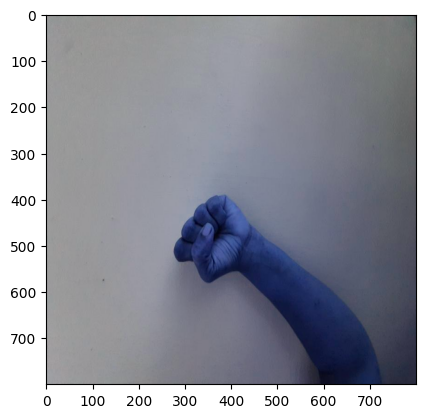

In [75]:
img1=cv2.imread('/home/lionex/bin/Python/Project-Kathakali/Kathakali Dataset/test/334_jpg.rf.edd9749623f4e84b6b8038637d6b606b.jpg')
cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

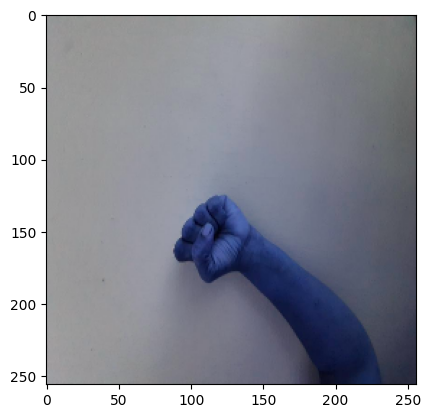

In [76]:
resize=tf.image.resize(img1,(256,256))
plt.imshow(resize.numpy().astype(int))

In [77]:
ypred=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 42ms/step


In [78]:
ypred

array([[0.02176089, 0.03112149, 0.9007251 , 0.00158449, 0.0448079 ]],
      dtype=float32)

In [79]:
ypred.max()

0.9007251

In [18]:
# def compute_bounding_box(confidence, x, y, w, h, threshold):
#     """Compute the bounding box coordinates for the detected object."""
#     if confidence < threshold:
#         return None
#     left = int(x - w/2)
#     right = int(x + w/2)
#     top = int(y - h/2)
#     bottom = int(y + h/2)
#     return (left, top, right, bottom)

In [27]:
# from keras.models import load_model
# from object_detection.utils import visualization_utils as vis_util
# from object_detection.utils import ops as utils_ops

# category_index = ['1','2','3','4','5']
# model = load_model('Kathakali.h5')

# def run_inference_for_single_image(model, image):
#     image = np.asarray(image)
#     input_tensor = tf.convert_to_tensor(image)
#     input_tensor = input_tensor[tf.newaxis,...]

#     model_fn = model.signatures['serving_default']
#     output_dict = model_fn(input_tensor)
#     num_detections = int(output_dict.pop('num_detections'))
#     output_dict = {key:value[0, :num_detections].numpy() 
#                    for key,value in output_dict.items()}
#     output_dict['num_detections'] = num_detections
#     output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
#     if 'detection_masks' in output_dict:
#         detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(output_dict['detection_masks'], output_dict['detection_boxes'],image.shape[0], image.shape[1])  
#         detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,tf.uint8)
#         output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
#     return output_dict

# def show_inference(model, frame):
#      image_np = np.array(frame)
#      output_dict = run_inference_for_single_image(model, image_np)
#      vis_util.visualize_boxes_and_labels_on_image_array(
#            image_np,
#            output_dict['detection_boxes'],output_dict['detection_classes'],output_dict['detection_scores'],
#            category_index,
#            instance_masks=output_dict.get('detection_masks_reframed', None),
#            use_normalized_coordinates=True,
#            line_thickness=5)
#      return(image_np)


# video_capture = cv2.VideoCapture(0)
# while True:
#       re,frame = video_capture.read()
#       Imagenp=show_inference(model, frame)
#       cv2.imshow('object detection', cv2.resize(Imagenp, (800,600)))
#       if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
# video_capture.release()
# cv2.destroyAllWindows()

[ WARN:0@13541.389] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@13541.391] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).